### Importing Important Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Downloading Dataset

In [2]:
%%bash
wget https://www.dropbox.com/s/cuqptq9u60wkh4s/IOC.csv

--2021-10-15 14:09:35--  https://www.dropbox.com/s/cuqptq9u60wkh4s/IOC.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/cuqptq9u60wkh4s/IOC.csv [following]
--2021-10-15 14:09:35--  https://www.dropbox.com/s/raw/cuqptq9u60wkh4s/IOC.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce1568d78047217a58f7712800b.dl.dropboxusercontent.com/cd/0/inline/BYE-0OUfVcbWhsR4IK6PcLEahDt_zHCkHsB9ltNO4z-tdDfU8JoDzuG8xEy4v_3ibePhD6AqT5gPqE1gd6PyhCodC10ckH3Kyr7pPHbMssyUzgqYoVzdSeed1jaRofIelGuWjBGlvhNEOjZXVdLq-SG3/file# [following]
--2021-10-15 14:09:36--  https://uce1568d78047217a58f7712800b.dl.dropboxusercontent.com/cd/0/inline/BYE-0OUfVcbWhsR4IK6PcLEahDt_zHCkHsB9ltNO4z-tdDfU8JoDzuG8xEy4v_3ibePhD6AqT5gPqE1gd6PyhCodC10ckH3Kyr7pPHbMs

### Reading Dataset

In [3]:
df = pd.read_csv("IOC.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,IOC,EQ,254.00,260.0,273.25,250.00,267.35,270.85,258.55,23700,6.127648e+11,NaN,NaN,NaN
1,2000-01-04,IOC,EQ,270.85,260.0,268.00,254.10,267.00,264.40,259.80,24400,6.339112e+11,NaN,NaN,NaN
2,2000-01-05,IOC,EQ,264.40,264.9,265.00,257.00,261.35,261.30,260.66,18900,4.926382e+11,NaN,NaN,NaN
3,2000-01-06,IOC,EQ,261.30,258.0,263.00,256.05,263.00,260.10,259.81,18150,4.715515e+11,NaN,NaN,NaN
4,2000-01-07,IOC,EQ,260.10,259.9,267.00,253.25,267.00,264.45,260.11,17650,4.590902e+11,NaN,NaN,NaN


###Rolling Window Statistics

####Lag features
1.   Use of prior timestamp or features of data which happened in past are useful because we can create our prediction as what happened in past can affect the future.

      Like if we want to predict sales at 4pm we should know yesterday's sale at 4pm.
      Maybe last week sales at 4pm on same day.

2.   These previous data ( in this senario sales data )is what actually lag features are.

3.   Inorder to extract meaningful information from data we create multiple lag features through we have set a fixed time period in past and group features by that time period like items sold in last 2hrs,3 weeks and last Month.

**For using this we use pd.shift()**

##### Shift operation

In [4]:
df.Close.shift(1)

0          NaN
1       270.85
2       264.40
3       261.30
4       260.10
         ...  
5301     88.05
5302     88.20
5303     88.85
5304     89.40
5305     88.90
Name: Close, Length: 5306, dtype: float64

In [5]:
df.Volume.shift(-1)

0          24400.0
1          18900.0
2          18150.0
3          17650.0
4          23550.0
           ...    
5301     8752415.0
5302     6336704.0
5303     8957163.0
5304    29815698.0
5305           NaN
Name: Volume, Length: 5306, dtype: float64



####Rolling Window Statistics
1.   The objective of using rolling window statistics is to compute statistics from a given data sample by defining a range that includes the data samples features itself as well as features of samples before and after sample used.
2.  Like what are the sales of the shop in the last 3 days, last 7 days , last month based on which shopkeeper can order more products for stock.
3.  One popular rolling window statistic measure is weighted average of previous features.

**For using this we use pd.rolling**

##### Window attribute
This defines no of timesteps of past of a feature used for calculating the statistics

In [6]:
df.Close.rolling(window=3).sum()

0          NaN
1          NaN
2       796.55
3       785.80
4       785.85
         ...  
5301    264.10
5302    265.10
5303    266.45
5304    267.15
5305    269.15
Name: Close, Length: 5306, dtype: float64

##### Min Periods attribute
The minimum no of non null value used for calculating statistic

In [7]:
df.Close.rolling(window=3,min_periods=1).sum()

0       270.85
1       535.25
2       796.55
3       785.80
4       785.85
         ...  
5301    264.10
5302    265.10
5303    266.45
5304    267.15
5305    269.15
Name: Close, Length: 5306, dtype: float64

In [8]:
df.Close.rolling(window=3,min_periods=2).sum()

0          NaN
1       535.25
2       796.55
3       785.80
4       785.85
         ...  
5301    264.10
5302    265.10
5303    266.45
5304    267.15
5305    269.15
Name: Close, Length: 5306, dtype: float64

##### Examples of Types of statistics calculated using window statistics


In [9]:
df.Close.rolling(window=3).mean()

0              NaN
1              NaN
2       265.516667
3       261.933333
4       261.950000
           ...    
5301     88.033333
5302     88.366667
5303     88.816667
5304     89.050000
5305     89.716667
Name: Close, Length: 5306, dtype: float64

In [10]:
df.Close.rolling(window=3).median()

0          NaN
1          NaN
2       264.40
3       261.30
4       261.30
         ...  
5301     88.05
5302     88.20
5303     88.85
5304     88.90
5305     89.40
Name: Close, Length: 5306, dtype: float64

In [11]:
df.Close.rolling(window=3).std()

0            NaN
1            NaN
2       4.871943
3       2.218859
4       2.246664
          ...   
5301    0.175594
5302    0.425245
5303    0.600694
5304    0.304138
5305    1.012834
Name: Close, Length: 5306, dtype: float64

In [12]:
df.Volume.rolling(window=3).sum()

0              NaN
1              NaN
2          67000.0
3          61450.0
4          54700.0
           ...    
5301    24560549.0
5302    23822774.0
5303    22155800.0
5304    24046282.0
5305    45109565.0
Name: Volume, Length: 5306, dtype: float64

In [13]:
df.Volume.rolling(window=2).sum().shift(2)

0              NaN
1              NaN
2              NaN
3          48100.0
4          43300.0
           ...    
5301    20356234.0
5302    17493868.0
5303    15070359.0
5304    15819096.0
5305    15089119.0
Name: Volume, Length: 5306, dtype: float64

##### Everything Together for the dataset to extract features

In [14]:
lag_features = ["High", "Low"]
window1 = 3
df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0).mean().shift(1).reset_index().astype(np.float32)
df_mean_3d = df[lag_features].rolling(window=window1, min_periods=0).mean().shift(1).reset_index().astype(np.float32)
df_std_3d = df[lag_features].rolling(window=window1, min_periods=0).std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_lag{window1}"] = df_rolled_3d[feature].astype('float32')
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature].astype('float32')
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature].astype('float32')

df.head().T

,0,1,2,3,4
Date,2000-01-03,2000-01-04,2000-01-05,2000-01-06,2000-01-07
Symbol,IOC,IOC,IOC,IOC,IOC
Series,EQ,EQ,EQ,EQ,EQ
Prev Close,254,270.85,264.4,261.3,260.1
Open,260,260,264.9,258,259.9
High,273.25,268,265,263,267
Low,250,254.1,257,256.05,253.25
Last,267.35,267,261.35,263,267
Close,270.85,264.4,261.3,260.1,264.45
VWAP,258.55,259.8,260.66,259.81,260.11


### Tackling NAN data
In real world data it often happens we dont have complete information due to several reasons.
These values are represented using NAN.

In [15]:
df.fillna(df.mean(), inplace=True)

### Extracting Date-Time features

#### Date Time features

1.   Created from time steps of each observation/data
2.   Can be hour, month,day,year ,minute ,etc
3.   Other observation could be like
4.   Weekend or not 
5.   Summer/ winter


In [16]:
# Convert string to datetime64
df['Date'] = df['Date'].apply(pd.to_datetime)
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["day"] = df.Date.dt.day
df["Month"] = df.Date.dt.month
df["day_of_week"] = df.Date.dt.dayofweek
df["year"] = df.Date.dt.year
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High_lag3,High_mean_lag3,High_std_lag3,Low_lag3,Low_mean_lag3,Low_std_lag3,day,Month,day_of_week,year
0,2000-01-03,IOC,EQ,254.00,260.0,273.25,250.00,267.35,270.85,258.55,23700,6.127648e+11,40210.116042,1.454141e+06,0.489827,324.821320,324.821320,5.096461,313.431000,313.431000,4.992313,3,1,0,2000
1,2000-01-04,IOC,EQ,270.85,260.0,268.00,254.10,267.00,264.40,259.80,24400,6.339112e+11,40210.116042,1.454141e+06,0.489827,273.250000,273.250000,5.096461,250.000000,250.000000,4.992313,4,1,1,2000
2,2000-01-05,IOC,EQ,264.40,264.9,265.00,257.00,261.35,261.30,260.66,18900,4.926382e+11,40210.116042,1.454141e+06,0.489827,270.625000,270.625000,3.712311,252.050003,252.050003,2.899138,5,1,2,2000
3,2000-01-06,IOC,EQ,261.30,258.0,263.00,256.05,263.00,260.10,259.81,18150,4.715515e+11,40210.116042,1.454141e+06,0.489827,268.750000,268.750000,4.175823,253.699997,253.699997,3.517101,6,1,3,2000
4,2000-01-07,IOC,EQ,260.10,259.9,267.00,253.25,267.00,264.45,260.11,17650,4.590902e+11,40210.116042,1.454141e+06,0.489827,265.333344,265.333344,2.516612,255.716660,255.716660,1.478456,7,1,4,2000


In [17]:
df.set_index('Date',inplace=True)
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High_lag3,High_mean_lag3,High_std_lag3,Low_lag3,Low_mean_lag3,Low_std_lag3,day,Month,day_of_week,year
Date,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,IOC,EQ,254.00,260.0,273.25,250.00,267.35,270.85,258.55,23700,6.127648e+11,40210.116042,1.454141e+06,0.489827,324.821320,324.821320,5.096461,313.431000,313.431000,4.992313,3,1,0,2000
2000-01-04,IOC,EQ,270.85,260.0,268.00,254.10,267.00,264.40,259.80,24400,6.339112e+11,40210.116042,1.454141e+06,0.489827,273.250000,273.250000,5.096461,250.000000,250.000000,4.992313,4,1,1,2000
2000-01-05,IOC,EQ,264.40,264.9,265.00,257.00,261.35,261.30,260.66,18900,4.926382e+11,40210.116042,1.454141e+06,0.489827,270.625000,270.625000,3.712311,252.050003,252.050003,2.899138,5,1,2,2000
2000-01-06,IOC,EQ,261.30,258.0,263.00,256.05,263.00,260.10,259.81,18150,4.715515e+11,40210.116042,1.454141e+06,0.489827,268.750000,268.750000,4.175823,253.699997,253.699997,3.517101,6,1,3,2000
2000-01-07,IOC,EQ,260.10,259.9,267.00,253.25,267.00,264.45,260.11,17650,4.590902e+11,40210.116042,1.454141e+06,0.489827,265.333344,265.333344,2.516612,255.716660,255.716660,1.478456,7,1,4,2000


In [18]:
df = df.drop(columns=['Symbol','Series'])

In [19]:
df.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High_lag3,High_mean_lag3,High_std_lag3,Low_lag3,Low_mean_lag3,Low_std_lag3,day,Month,day_of_week,year
Date,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,254.00,260.0,273.25,250.00,267.35,270.85,258.55,23700,6.127648e+11,40210.116042,1.454141e+06,0.489827,324.821320,324.821320,5.096461,313.431000,313.431000,4.992313,3,1,0,2000
2000-01-04,270.85,260.0,268.00,254.10,267.00,264.40,259.80,24400,6.339112e+11,40210.116042,1.454141e+06,0.489827,273.250000,273.250000,5.096461,250.000000,250.000000,4.992313,4,1,1,2000
2000-01-05,264.40,264.9,265.00,257.00,261.35,261.30,260.66,18900,4.926382e+11,40210.116042,1.454141e+06,0.489827,270.625000,270.625000,3.712311,252.050003,252.050003,2.899138,5,1,2,2000
2000-01-06,261.30,258.0,263.00,256.05,263.00,260.10,259.81,18150,4.715515e+11,40210.116042,1.454141e+06,0.489827,268.750000,268.750000,4.175823,253.699997,253.699997,3.517101,6,1,3,2000
2000-01-07,260.10,259.9,267.00,253.25,267.00,264.45,260.11,17650,4.590902e+11,40210.116042,1.454141e+06,0.489827,265.333344,265.333344,2.516612,255.716660,255.716660,1.478456,7,1,4,2000


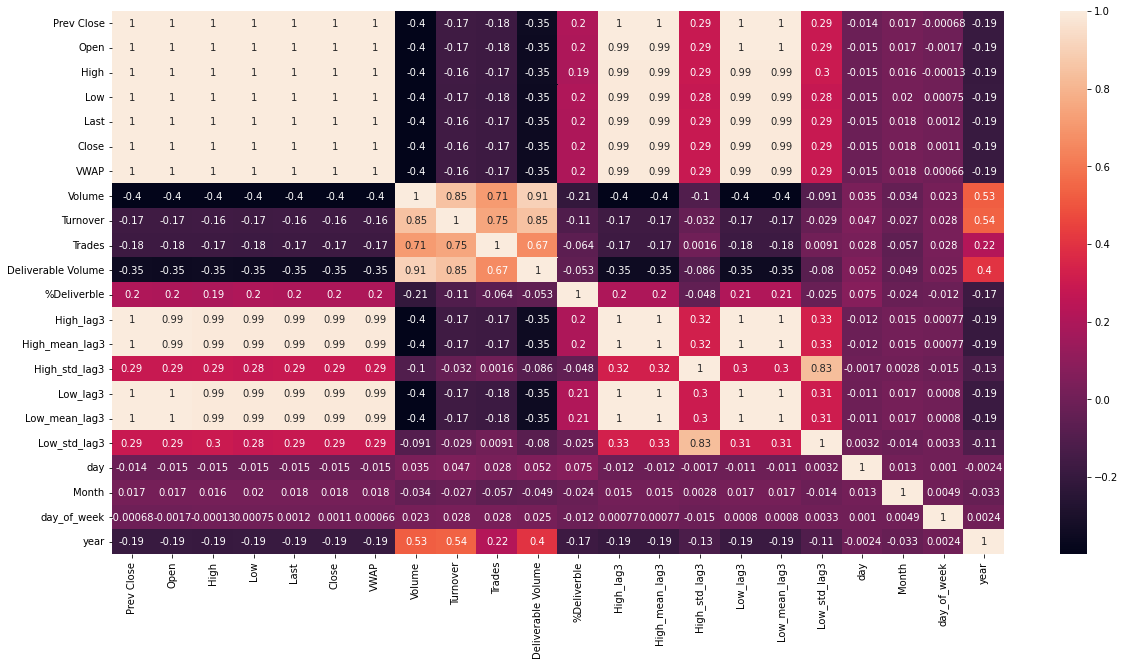

In [20]:
plt.figure(figsize = (20,10))       
sns.heatmap(df.corr(),annot = True)

In [21]:
y = df["VWAP"]

In [22]:
X = df.drop(columns=['VWAP'])

### Using sklearn library 


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
reg = LinearRegression().fit(X_train,y_train)
reg.score(X_test,y_test)

0.9998237388305045